## Exploring Hubble Images
The aim of this notebook is to explore the Hubble observations and cutouts which will be used to create the training set.

In [64]:
from astropy.io import fits
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import PercentileInterval, LinearStretch, ImageNormalize, SqrtStretch, ZScaleInterval
from astropy.visualization import LinearStretch, SqrtStretch, PowerStretch, SquaredStretch, LogStretch, AsinhStretch, SinhStretch, CompositeStretch
from astropy.nddata import Cutout2D
from astropy import wcs
import astropy.units as u
from astropy.coordinates import SkyCoord

from reproject.mosaicking import find_optimal_celestial_wcs, reproject_and_coadd
from reproject import reproject_interp

In [46]:
folder = 'C:\\Users\\oryan\\Documents\\zoobot_new\\preprocessed-cutouts\\mastDownload\\HST\\'

In [47]:
filename_1 = os.path.join(folder, 'hst_9822_22_acs_wfc_f814w_j8pu22\\hst_9822_22_acs_wfc_f814w_j8pu22_drc.fits')

In [48]:
hdu_1 = fits.open(filename_1)[1]
image_header_1 = fits.open(filename_1)[1].header
image_1_data = fits.open(filename_1)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


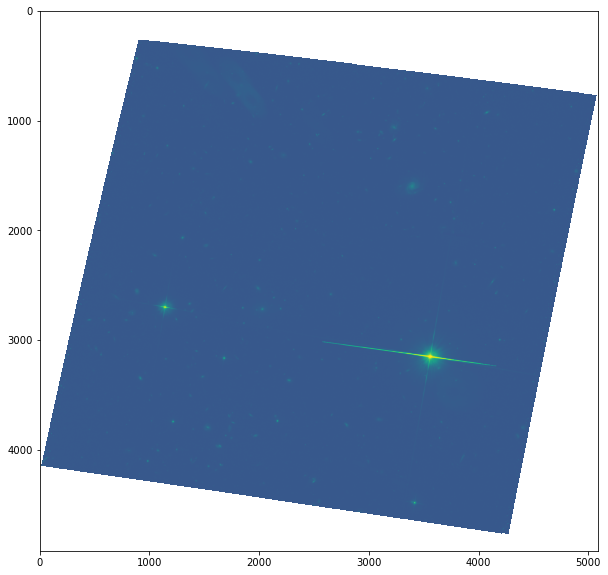

In [49]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(image_1_data))

In [50]:
coords = SkyCoord(ra=150.4303304 * u.deg, dec=1.8613697 * u.deg, frame='fk5')

In [53]:
cutout = Cutout2D(image_1_data, coords, (300,300), wcs=wcs.WCS(image_header_1), mode='partial')

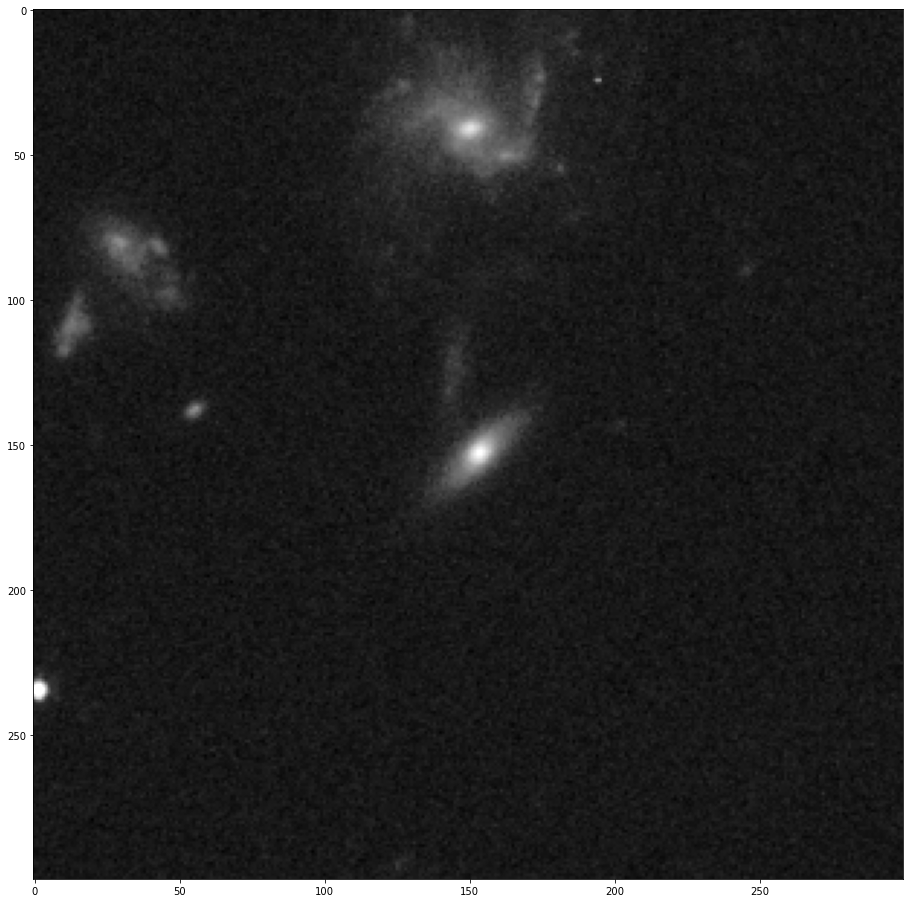

In [68]:
norm = ImageNormalize(cutout.data, interval=ZScaleInterval(nsamples=5000,contrast=0.01),stretch=AsinhStretch(),clip=True)
plt.figure(figsize=(16,16))
plt.imshow(cutout.data,cmap='Greys_r',norm=norm)

In [9]:
filename_2 = os.path.join(folder, 'hst_10092_0h_acs_wfc_f814w_j8xi0h\hst_10092_0h_acs_wfc_f814w_j8xi0h_drc.fits')

In [10]:
hdu_2 = fits.open(filename_2)[1]
image_header_2 = fits.open(filename_2)[1].header
image_2_data = fits.open(filename_2)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


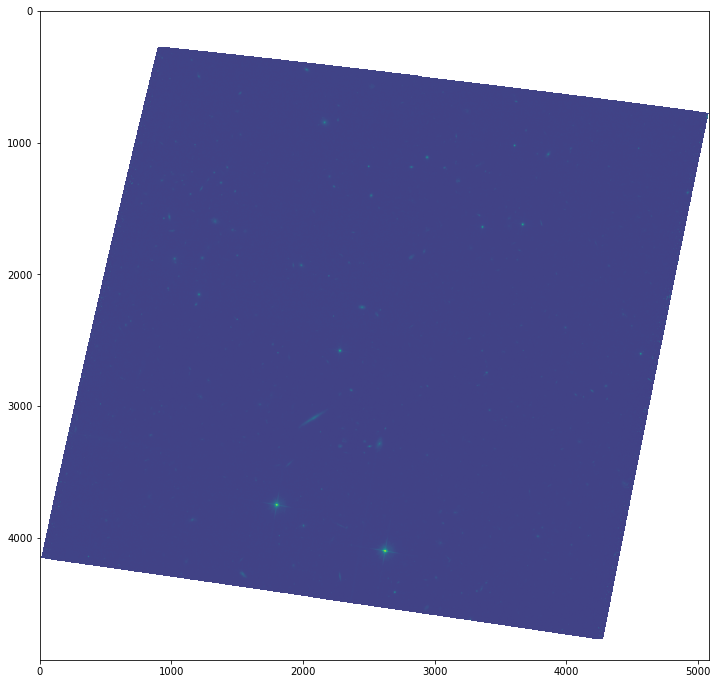

In [11]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_2_data))

In [12]:
hdus = [hdu_1, hdu_2]

In [13]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

In [14]:
array, footprint = reproject_and_coadd(hdus, output_projection=wcs_out, shape_out = shape_out, reproject_function=reproject_interp)

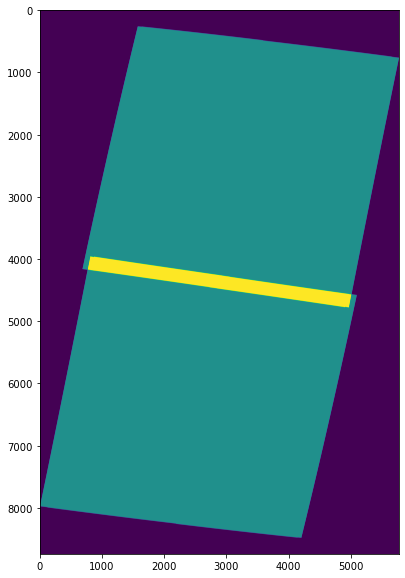

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(footprint)

In [16]:
filename_3 = os.path.join(folder, 'hst_10092_4g_acs_wfc_f814w_j8xi4g\\hst_10092_4g_acs_wfc_f814w_j8xi4g_drc.fits')

In [17]:
hdu_3 = fits.open(filename_3)[1]
image_header_3 = fits.open(filename_3)[1].header
image_3_data = fits.open(filename_3)[1].data

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


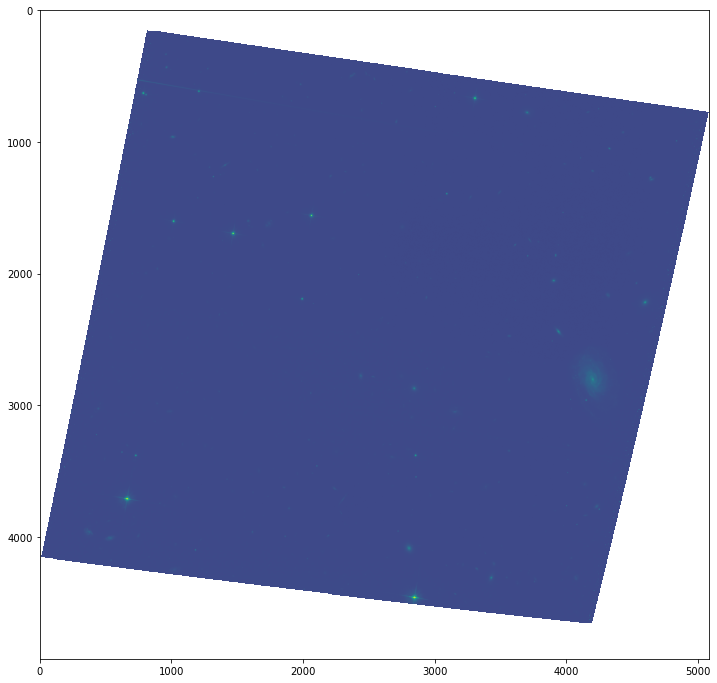

In [18]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(image_3_data))

In [19]:
hdus = [hdu_1,hdu_2,hdu_3]

In [20]:
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

In [21]:
array, footprint = reproject_and_coadd(hdus,wcs_out,shape_out=shape_out,reproject_function=reproject_interp)

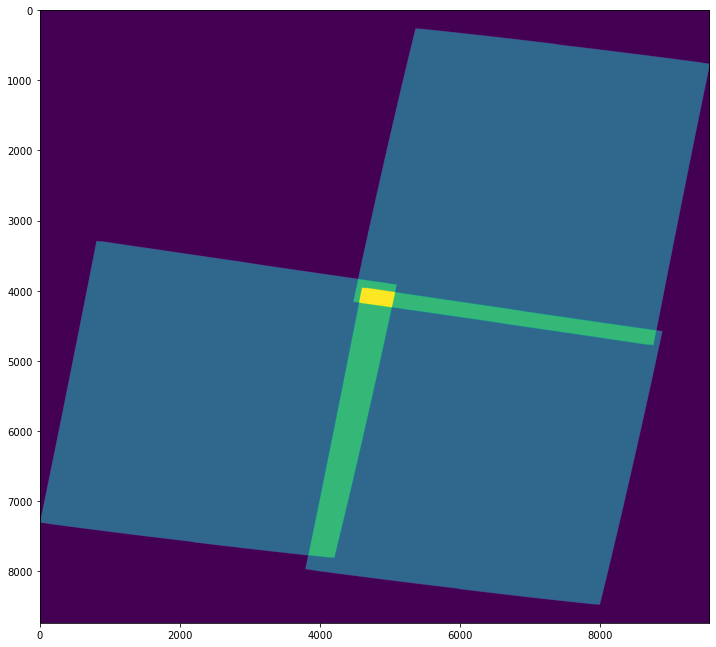

In [22]:
plt.figure(figsize=(12,12))
plt.imshow(footprint)

In [23]:
image_header_3

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 5088                                                  
NAXIS2  =                 4927                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'SCI     '           / extension name                                 
EXTVER  =                    1                                                  
BUNIT   = 'ELECTRONS/S'        / Units of science product                       
                                                                                
              / WFC CCD CHIP

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


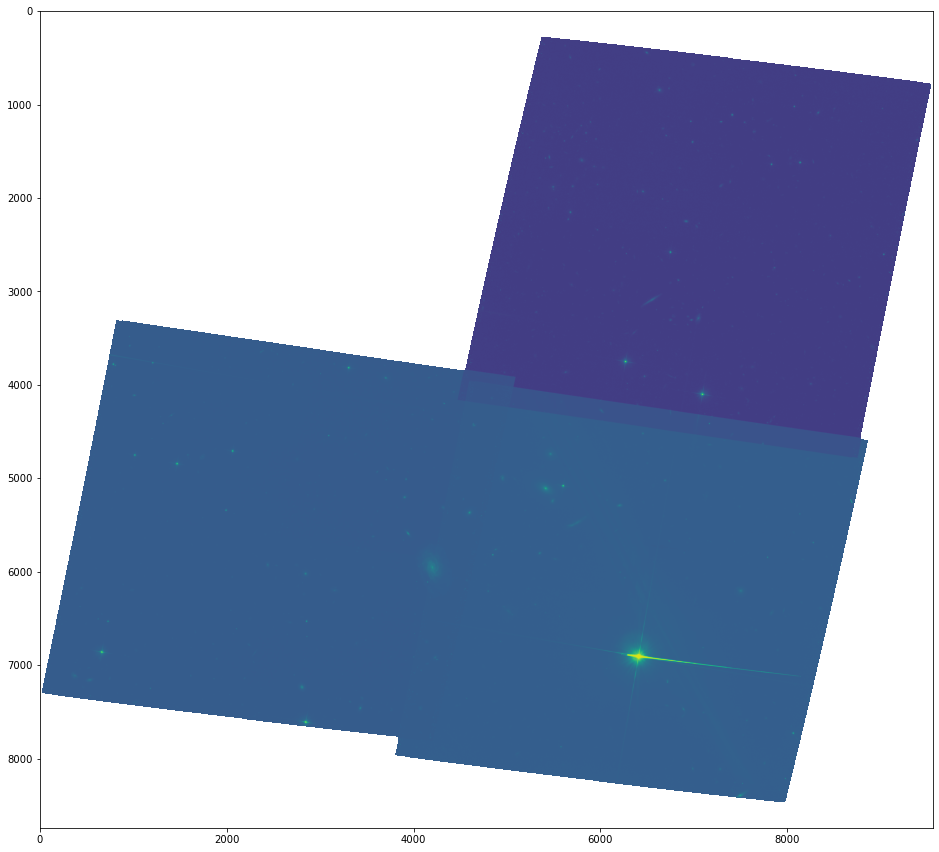

In [24]:
plt.figure(figsize=(16,16))
plt.imshow(np.log10(array))

In [25]:
coords = SkyCoord(ra=150.562364 * u.deg, dec=1.8324716 * u.deg, frame='fk5')

In [26]:
pix_coords = list(wcs.utils.skycoord_to_pixel(coords,wcs_out))

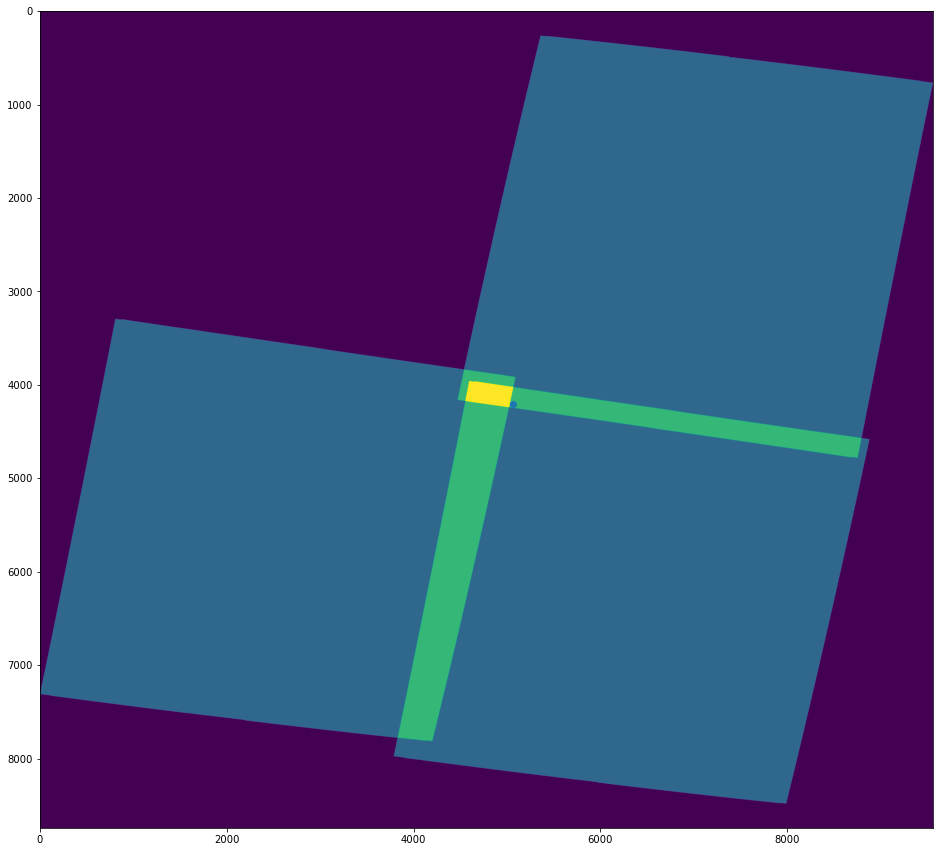

In [27]:
plt.figure(figsize=(16,16))
plt.scatter(pix_coords[0],pix_coords[1])
plt.imshow(footprint)

In [28]:
cutout = Cutout2D(array, coords, (150,150), wcs=wcs_out, mode='partial')

In [29]:
norm = ImageNormalize(np.log10(cutout.data), interval=ZScaleInterval(),stretch=LinearStretch())
plt.figure(figsize=(16,16))
plt.imshow(np.log10(cutout.data),cmap='Greys_r',norm=norm)

NameError: name 'ZScaleInterval' is not defined

In [ ]:
image_header_1

In [ ]:
image_header_2

In [ ]:
image_header_3